# The T-Distribution <hr style="border:2.5px solid blue;">

Data Analyst: Chris Jomar A. Aurelio <br>
Department: Electrical Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("transformer-voltage-10-sample.csv",delimiter=",")
df

,Sample,Voltage
0,1,120.2
1,2,94.4
2,3,119.9
3,4,120.1
4,5,120.2
5,6,120.4
6,7,120.3
7,8,119.8
8,9,120.1
9,10,139.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sample   10 non-null     int64  
 1   Voltage  10 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 292.0 bytes


In [4]:
df.describe()

,Sample,Voltage
count,10.00000,10.000000
mean,5.50000,119.440000
std,3.02765,10.612487
min,1.00000,94.400000
25%,3.25000,119.950000
50%,5.50000,120.150000
75%,7.75000,120.275000
max,10.00000,139.000000


In [5]:
alpha = 0.05
dof = df['Voltage'].count()-1
  
t_critical = stats.t.ppf(1-alpha/2,dof)
t_critical

np.float64(2.2621571628540993)

In [6]:

ci_lower, ci_upper = stats.t.interval(
      confidence = 0.95,
      df = df['Voltage'].count()-1,
      loc = df['Voltage'].mean(),
      scale = df['Voltage'].std(ddof=1)/np.sqrt(df['Voltage'].count())
  )

In [7]:
ci_lower

np.float64(111.8482838462108)

In [8]:
ci_upper

np.float64(127.03171615378922)

In [9]:
print("Confidence Interval - ", ci_lower.round(2),",", ci_upper.round(2))

Confidence Interval -  111.85 , 127.03


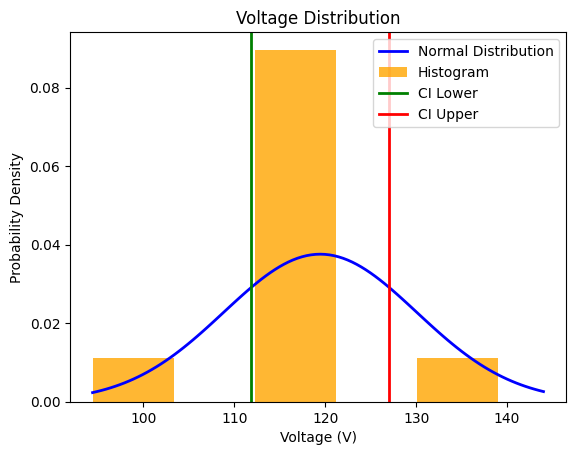

In [12]:
# voltage distribution
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

# x-axis
x_min = df['Voltage'].min()
x_max = df['Voltage'].max() + 5

# normal distribution plot (blue)
x = np.linspace(x_min, x_max, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, color='blue', linewidth=2, label='Normal Distribution')

# histogram (orange)
plt.hist(df['Voltage'], bins=5, density=True, color='orange', alpha=0.8, label='Histogram')

plt.title('Voltage Distribution')
plt.ylabel('Probability Density')
plt.xlabel('Voltage (V)')

# confidence interval lines
plt.axvline(x=ci_lower, color='green', linestyle='-', linewidth=2, label='CI Lower')
plt.axvline(x=ci_upper, color='red', linestyle='-', linewidth=2, label='CI Upper')

plt.legend()
plt.show()